<a href="https://colab.research.google.com/github/tefarov/netology_pyda5/blob/master/asb_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics as st
import seaborn as sb

In [0]:
pth = "/content/drive/My Drive/EDU.Netology/HousePrices.csv"
data = pd.read_csv(pth,sep=';')

In [22]:
data.head(5)

,No,Rooms,DistMetro,Area,Price
0,1,3,12,56,9396
1,2,2,4,54,9785
2,3,1,2,31,5783
3,4,2,8,48,9123
4,5,1,11,31,5662


# Задание 1. Построить гистограмму
Постройте гистограммы распределения цен для каждой категории (по количеству комнат).
Какие выводы можно сделать на основе полученных гистограмм?

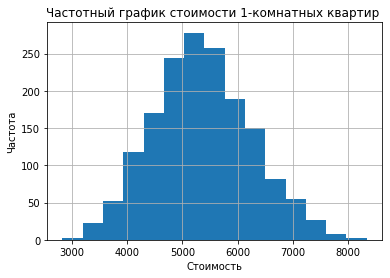

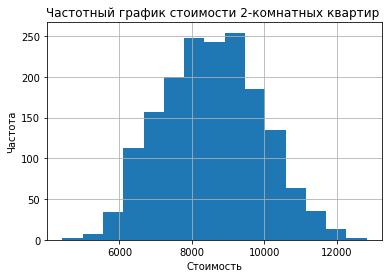

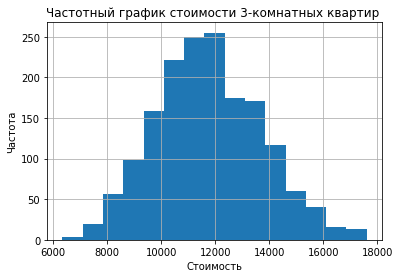

In [28]:
room_sr = pd.Series(data['Rooms'].unique()).sort_values()
for room in room_sr:
  dsp = data.loc[data['Rooms']==room]
  
  n, bins, patches = plt.hist(dsp['Price'], 15)

  plt.xlabel('Стоимость')
  plt.ylabel('Частота')
  plt.title(f'Частотный график стоимости {room}-комнатных квартир ')
  plt.grid(True)
  plt.show()


## Вывод
Судя по графикам, можно сделать вывод о том, что распределения цен на все типы квартир близки к нормальному распределению, но у каждого своё мат.оожидание и дисперсия.

# Задание 2. Оценить корреляцию
Используя знакомые вам методы, дайте оценку корреляции цены и площади квартиры отдельно по каждой категории (по количеству комнат). Какие выводы можно сделать из этой оценки?



In [33]:
room_sr = pd.Series(data['Rooms'].unique()).sort_values()
for room in room_sr:
  dsp = data.loc[data['Rooms']==room]

  cor = dsp['Price'].corr(dsp['Area'])
  print(f'Корреляция площади и цены для {room}-комн. квартир:{cor:.2}')

Корреляция площади и цены для 1-комн. квартир:0.65
Корреляция площади и цены для 2-комн. квартир:0.71
Корреляция площади и цены для 3-комн. квартир:0.74


## Вывод
Взимосвязь стоимости квартиры и её площади достаточно сильная в каждой из категорий. Наибольшая взаимосвязь наблюдается у трёхкомнатных квартир, а наименьшая у однокомнатных. Т.е. вероятно квартиры с большим метражом вероятно будут стоить дороже аналогов с меньшей площадью.

# Задание 3. Рассчитать квартили
Рассчитайте границы квартилей распределения цен на 2х квартиры площадью более 40 кв. метров.


In [54]:
dsp = data.loc[data['Rooms']==2]
dsp = dsp.loc[dsp['Area']>40]

quarts = {a:a * 0.25 for a in range(5)}

for i,q in quarts.items():
  quart = dsp['Price'].quantile(q)
  print(f'Q{i} ({q:.2f}) = {quart:.0f}')

Q0 (0.00) = 4427
Q1 (0.25) = 7924
Q2 (0.50) = 8812
Q3 (0.75) = 9684
Q4 (1.00) = 12833


# Задание 4. Решить задачу
Вы являетесь риелтором, ваша прибыль это комиссия 3% от суммы сделки купли-продажи квартир (цена квартиры). В текущем квартале у вас ожидается 25 сделок купли-продажи 3-х комнатных квартир. Оцените вероятность того, что ваша суммарная прибыль от этих продаж превысит 9 млн. 200 тыс.

*В каждой категории разная степень корреляции. Т.е. у 3 комнатных она может быть иная, чем у однокомнатных.

## Вариант Монте-Карло
Добавим столбец с прибылью
Просто проведём 20.000 экспериментов, в каждом из которых случайным образом отберём 25 сделок, посчитаем процент экспериментов в которых суммарная прибыль от сделок превысила необходимый порог и получим ориентировочную оценку

In [120]:
dsp = data.copy().loc[data['Rooms']==3]
dsp['Income'] = dsp['Price'] * 0.03

test = [0,0]
r = 10000

print('Экспериментов завершено:',end=' ')
for i in range(0,r + 1):
  sal = dsp.sample(25)
  inc = sal['Income'].sum()

  test[1 if inc> 9200 else 0] += 1

  if (i % 1000) == 0: print(f'{i}',end=' ')

print()
rst = test[1]/r
print(f'Успешных экспериментов: {rst:.2%}')



Экспериментов завершено: 0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 
Успешных экспериментов: 9.44%


### Вывод
В 9.44% случаев прибыль превысит необходимые 9.200 тыс.руб

# Задание 5. Решить задачу
Рассчитать дисперсию стоимости кв.метра в каждой категории. Как меняется дисперсия с количеством комнат? Есть ли (и какая) связь с изменением коэффициента корреляции?

In [81]:
print(' '*9 + ' дисперсия | корр | корр.м | квартили цены кв.метра\r\n' + '-'*70)

room_sr = pd.Series(data['Rooms'].unique()).sort_values()
for room in room_sr:
  dsp = data.loc[data['Rooms']==room]
  
  are_sr = dsp['Area']         # area series
  prc_sr = dsp['Price']        # flat price series
  prm_sr = prc_sr / are_sr     # meterprice series
  
  dat_sr = prm_sr

  dis = dat_sr.var()            # дисперсия цены за метр
  std = dat_sr.std()            # среднеквадратич.отклонение цены кв.метра
  prc_cr = prc_sr.corr(are_sr)  # корреляция цены квартиры и площади
  prm_cr = prm_sr.corr(are_sr)  # корреляция цены метра и площади
  prm_q0 = prm_sr.quantile(0.00)
  prm_q1 = prm_sr.quantile(0.25)
  prm_q2 = prm_sr.quantile(0.50)
  prm_q3 = prm_sr.quantile(0.75)
  prm_q4 = prm_sr.quantile(1.00)
  
  print(f'{room}-комнатная: {dis: >6,.2f} | {prc_cr:>4.2f} | {prm_cr:>6.2f} | {prm_q0:.1f}  {prm_q1:.1f}  {prm_q2:.1f}  {prm_q3:.1f}  {prm_q4:.1f}')


          дисперсия | корр | корр.м | квартили цены кв.метра
----------------------------------------------------------------------
1-комнатная: 580.09 | 0.65 |  -0.13 | 117.1  174.8  191.5  209.5  270.3
2-комнатная: 420.14 | 0.71 |  -0.11 | 103.0  166.4  180.9  194.2  247.6
3-комнатная: 381.65 | 0.74 |  -0.09 | 106.7  161.9  174.9  188.9  238.6


## Вывод
По таблице видно, что дисперсия стоимости кв.метра жилья сокращается, что говорит о том, что разброс цен на жильё с ростом количества комнат сокращается.
Изучив корреляцию между площадью жилья и стоимостью квартиры, можно сделать вывод, что взаимосвязь между двумя этими факторами значительна (0.65 до 0.74), что говорит о том, что с ростом площади квартиры, её стоимость, скорее всего, тоже возрастёт.
Одновременно стоит изучить корреляццию между ценой кв.метра и площадью квратиры. Взаимосвязь между этими факторами очень слабая и отрицательная, что говорит о том, что с ростом площади квартиры, цена её кв.метра в среднем снижается, но по сравнению с разбросом значений, это весьма незначительно.

---
Взаимосвязи между ценой кв.метра и площадью проилюстрированы на графиках ниже

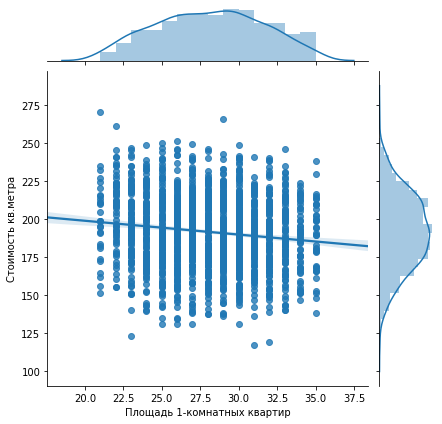

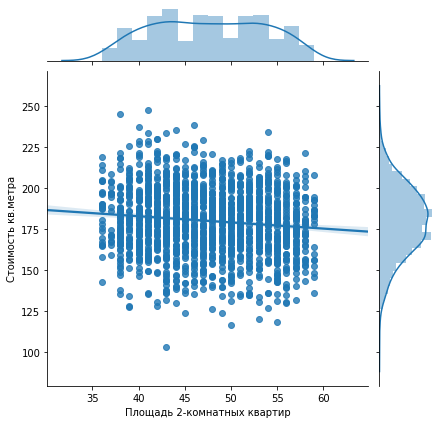

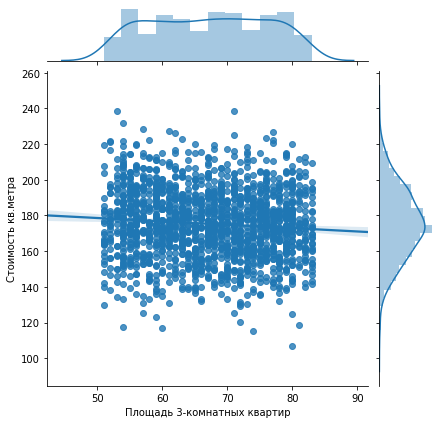

In [72]:
room_sr = pd.Series(data['Rooms'].unique()).sort_values()
for room in room_sr:
  dsp = data.loc[data['Rooms']==room]

  are_sr = dsp['Area']
  prc_sr = dsp['Price']
  prm_sr = prc_sr / are_sr     # meterprice-series

  fig = sb.jointplot(x=are_sr,y=prm_sr,kind='reg')
  plt.ylabel('Стоимость кв.метра')  
  plt.xlabel(f'Площадь {room}-комнатных квартир')
  plt.show()